<a id=top-page></a>

# `pykitPIV` demo: Create a **PyTorch** data loader for **pykitPIV**-generated images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload-images">Upload pykitPIV-generated images 
</a></li>
</ol>
<p></p>
</div>
<br>

***

In [16]:
import numpy as np
import h5py
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

<a id=upload-images></a>

***

## Upload **pykitPIV**-generated images 

[Go to the top](#top-page)

In [2]:
path = '../docs/data/pykitPIV-dataset-10-PIV-pairs-256-by-256.h5'

In [4]:
class PIVDataset(Dataset):
    """
    Loads and stores the pykitPIV-generated dataset.
    """

    def __init__(self, path, transform=None):

        # Upload the dataset:
        f = h5py.File(path, "r")

        # Access image intensities:
        self.data = np.array(f["I"]).astype("float32")

        # Access flow targets:
        self.target = np.array(f["targets"]).astype("float32")

        # Multiply the v-component of velocity by -1:
        self.target[:,1,:,:] = -self.target[:,1,:,:]

        f.close()

        # Allow for any custom data transforms to be used later:
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        # Get the sample:
        sample = self.data[idx], self.target[idx]

        # Apply any custom data transforms on this sample:
        if self.transform:
            sample = self.transform(sample)

        return sample

In [5]:
PIV_data = PIVDataset(path=path)

In [6]:
len(PIV_data)

10

In [7]:
(I, target) = PIV_data[2]

In [8]:
(I, target) = PIV_data[2:7]

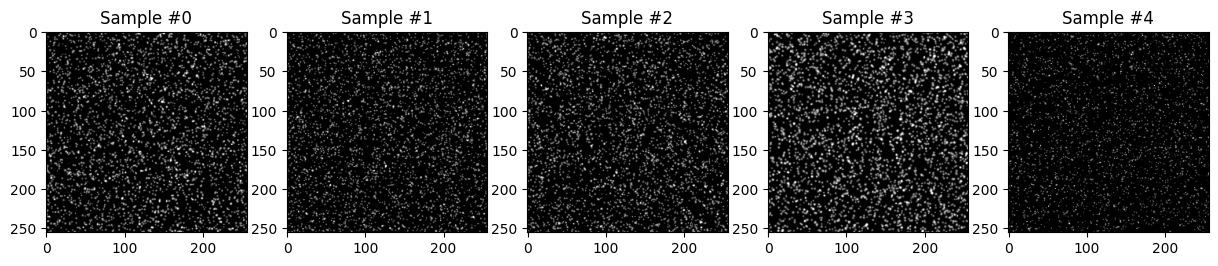

In [30]:
n_samples = 5

fig = plt.figure(figsize=(n_samples*3, 5))
spec = fig.add_gridspec(ncols=n_samples, 
                        nrows=1, 
                        width_ratios=[1 for i in range(0,n_samples)], 
                        height_ratios=[1])

for i in range(0,n_samples):
    I, target = PIV_data[i]
    f = fig.add_subplot(spec[0,i])
    plt.imshow(I[0,:,:], cmap='Greys_r')
    plt.title('Sample #' + str(i))

plt.savefig('PIV-samples.png', dpi=300, bbox_inches='tight')

***